# Project - Data Cleaning

## Introduction
In this lab, we'll make use of everything we've learned about pandas, data cleaning, and exploratory data analysis. In order to complete this lab, you'll have to import, clean, combine, reshape, and visualize data to answer questions provided, as well as your own questions!

## Objectives
You will be able to:
- Use different types of joins to merge DataFrames 
- Identify missing values in a dataframe using built-in methods 
- Evaluate and execute the best strategy for dealing with missing, duplicate, and erroneous values for a given dataset 
- Inspect data for duplicates or extraneous values and remove them 


## The dataset
In this lab, we'll work with the comprehensive [Super Heroes Dataset](https://www.kaggle.com/claudiodavi/superhero-set/data), which can be found on Kaggle!


## Getting Started

In the cell below:

* Import and alias pandas as `pd`
* Import and alias numpy as `np`
* Import and alias seaborn as `sns`
* Import and alias matplotlib.pyplot as `plt`
* Set matplotlib visualizations to display inline in the notebook

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

For this lab, our dataset is split among two different sources -- `'heroes_information.csv'` and `'super_hero_powers.csv'`.

Use pandas to read in each file and store them in DataFrames in the appropriate variables below. Then, display the `.head()` of each to ensure that everything loaded correctly.  

In [2]:
heroes_df = pd.read_csv('heroes_information.csv')
powers_df = pd.read_csv('super_hero_powers.csv')

In [3]:
heroes_df.head()

,Unnamed: 0,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
1,1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
4,4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0


In [4]:
powers_df.head()

,hero_names,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
0,3-D Man,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,A-Bomb,False,True,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Abe Sapien,True,True,False,False,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Abin Sur,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Abomination,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


It looks as if the heroes information dataset contained an index column.  We did not specify that this dataset contained an index column, because we hadn't seen it yet. Pandas does not know how to tell apart an index column from any other data, so it stored it with the column name `Unnamed: 0`.  

Our DataFrame provided row indices by default, so this column is not needed.  Drop it from the DataFrame in place in the cell below, and then display the head of `heroes_df` to ensure that it worked properly. 

In [5]:
heroes_df.drop('Unnamed: 0', inplace=True, axis=1)

In [6]:
heroes_df.head()

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0


## Familiarize yourself with the dataset

The first step in our Exploratory Data Analysis will be to get familiar with the data.  This step includes:

* Understanding the dimensionality of your dataset
* Investigating what type of data it contains, and the data types used to store it
* Discovering how missing values are encoded, and how many there are
* Getting a feel for what information it does and doesn't contain

In the cell below, get the descriptive statistics of each DataFrame.  

In [7]:
heroes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 734 entries, 0 to 733
Data columns (total 10 columns):
name          734 non-null object
Gender        734 non-null object
Eye color     734 non-null object
Race          734 non-null object
Hair color    734 non-null object
Height        734 non-null float64
Publisher     719 non-null object
Skin color    734 non-null object
Alignment     734 non-null object
Weight        732 non-null float64
dtypes: float64(2), object(8)
memory usage: 57.5+ KB


In [8]:
print('Unique Values')
for col in heroes_df.columns:
    print(f'{col} has {len(heroes_df[col].unique())} of {len(heroes_df[~heroes_df[col].isnull()])}')
    print(heroes_df[col].unique())

Unique Values
name has 715 of 734
['A-Bomb' 'Abe Sapien' 'Abin Sur' 'Abomination' 'Abraxas' 'Absorbing Man'
 'Adam Monroe' 'Adam Strange' 'Agent 13' 'Agent Bob' 'Agent Zero'
 'Air-Walker' 'Ajax' 'Alan Scott' 'Alex Mercer' 'Alex Woolsly'
 'Alfred Pennyworth' 'Alien' 'Allan Quatermain' 'Amazo' 'Ammo'
 'Ando Masahashi' 'Angel' 'Angel Dust' 'Angel Salvadore' 'Angela'
 'Animal Man' 'Annihilus' 'Ant-Man' 'Ant-Man II' 'Anti-Monitor'
 'Anti-Spawn' 'Anti-Venom' 'Apocalypse' 'Aquababy' 'Aqualad' 'Aquaman'
 'Arachne' 'Archangel' 'Arclight' 'Ardina' 'Ares' 'Ariel' 'Armor'
 'Arsenal' 'Astro Boy' 'Atlas' 'Atom' 'Atom Girl' 'Atom II' 'Atom III'
 'Atom IV' 'Aurora' 'Azazel' 'Azrael' 'Aztar' 'Bane' 'Banshee' 'Bantam'
 'Batgirl' 'Batgirl III' 'Batgirl IV' 'Batgirl V' 'Batgirl VI' 'Batman'
 'Batman II' 'Battlestar' 'Batwoman V' 'Beak' 'Beast' 'Beast Boy' 'Beetle'
 'Ben 10' 'Beta Ray Bill' 'Beyonder' 'Big Barda' 'Big Daddy' 'Big Man'
 'Bill Harken' 'Billy Kincaid' 'Binary' 'Bionic Woman' 'Bird-Brain'
 'Bi

In [9]:
len(heroes_df[heroes_df.duplicated()])

1

In [10]:
heroes_df[heroes_df.duplicated()]

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
291,Goliath,Male,-,Human,-,-99.0,Marvel Comics,-,good,-99.0


In [11]:
heroes_df.isna()['Publisher'].sum()

15

In [12]:
heroes_df['name'].value_counts().head(17)


Goliath           3
Spider-Man        3
Atlas             2
Vindicator        2
Black Canary      2
Blue Beetle       2
Toxin             2
Batgirl           2
Angel             2
Speedy            2
Batman            2
Namor             2
Captain Marvel    2
Firestorm         2
Atom              2
Nova              2
Blizzard          2
Name: name, dtype: int64

In [13]:
heroes_df[heroes_df['name'] == 'Atom']

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
49,Atom,Male,blue,-,Red,178.0,DC Comics,-,good,68.0
50,Atom,Male,-,-,-,-99.0,DC Comics,-,good,-99.0


In [14]:
heroes_df['Gender'].value_counts()

Male      505
Female    200
-          29
Name: Gender, dtype: int64

In [15]:
heroes_df['Eye color'].value_counts()

blue                       225
-                          172
brown                      126
green                       73
red                         46
black                       23
yellow                      19
white                       17
grey                         6
hazel                        6
purple                       4
gold                         3
yellow (without irises)      2
amber                        2
violet                       2
white / red                  1
silver                       1
bown                         1
indigo                       1
yellow / red                 1
blue / white                 1
yellow / blue                1
green / blue                 1
Name: Eye color, dtype: int64

In [16]:
heroes_df['Race'].value_counts()

-                    304
Human                208
Mutant                63
God / Eternal         14
Human / Radiation     11
                    ... 
Human / Clone          1
Ungaran                1
Parademon              1
Human-Vulcan           1
Tamaranean             1
Name: Race, Length: 62, dtype: int64

In [17]:
heroes_df['Hair color'].value_counts()

-                   172
Black               158
Blond                99
Brown                86
No Hair              75
Red                  51
White                23
Auburn               13
Green                 8
Strawberry Blond      7
Purple                5
Grey                  5
Brown / White         4
Silver                4
blond                 3
Blue                  3
black                 3
Yellow                2
Orange                2
Red / White           1
Indigo                1
Red / Orange          1
Orange / White        1
Gold                  1
Brown / Black         1
Magenta               1
Red / Grey            1
Pink                  1
Brownn                1
Black / Blue          1
Name: Hair color, dtype: int64

In [18]:
heroes_df['Height'].value_counts()

-99.0     217
 183.0     59
 188.0     51
 178.0     39
 180.0     38
 185.0     35
 175.0     34
 168.0     29
 170.0     26
 165.0     26
 191.0     21
 193.0     21
 198.0     18
 173.0     17
 201.0     11
 196.0     11
 163.0      8
 213.0      7
 203.0      5
 211.0      5
 157.0      5
 244.0      4
 229.0      3
 155.0      3
 218.0      3
 226.0      3
 122.0      2
 206.0      2
 279.0      2
 366.0      2
 137.0      2
 30.5       2
 305.0      2
 61.0       1
 975.0      1
 142.0      1
 287.0      1
 267.0      1
 304.8      1
 701.0      1
 876.0      1
 259.0      1
 15.2       1
 297.0      1
 257.0      1
 62.5       1
 66.0       1
 160.0      1
 140.0      1
 234.0      1
 71.0       1
 79.0       1
 108.0      1
 64.0       1
Name: Height, dtype: int64

In [19]:
heroes_df['Skin color'].value_counts()

-                 662
green              21
blue                9
red                 9
white               7
grey                5
silver              5
gold                3
purple              3
pink                2
yellow              2
black               1
blue-white          1
orange              1
gray                1
orange / white      1
red / black         1
Name: Skin color, dtype: int64

In [20]:
heroes_df['Alignment'].value_counts()

good       496
bad        207
neutral     24
-            7
Name: Alignment, dtype: int64

In [21]:
heroes_df['Weight'].value_counts()

-99.0     237
 79.0      23
 54.0      23
 81.0      22
 90.0      19
         ... 
 132.0      1
 38.0       1
 412.0      1
 320.0      1
 855.0      1
Name: Weight, Length: 135, dtype: int64

    POWERS

In [22]:
powers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 667 entries, 0 to 666
Columns: 168 entries, hero_names to Omniscient
dtypes: bool(167), object(1)
memory usage: 114.1+ KB


In [23]:
powers_df.isna().sum()

hero_names               0
Agility                  0
Accelerated Healing      0
Lantern Power Ring       0
Dimensional Awareness    0
                        ..
Phoenix Force            0
Molecular Dissipation    0
Vision - Cryo            0
Omnipresent              0
Omniscient               0
Length: 168, dtype: int64

In [24]:
powers_df[powers_df.duplicated()]

,hero_names,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient


In [25]:
heroes_df['Height'].mean()

102.25408719346049

In [26]:
heroes_df['Weight'].mean()

43.8551912568306

In [27]:
heroes_df['Height'][heroes_df['Height'] != -99].mean()

186.72630560928434

In [28]:
heroes_df['Weight'][heroes_df['Weight'] != -99].mean()

112.25252525252525

In [29]:
heroes_df['Height'][heroes_df['Height'] != -99].median()

183.0

In [30]:
heroes_df['Weight'][heroes_df['Weight'] != -99].median()

81.0

In [31]:
heroes_df['Height'][heroes_df['Height'] != -99].std()

59.25189465200382

In [32]:
heroes_df['Weight'][heroes_df['Weight'] != -99].std()

104.15114206482693

In [33]:
heroes_df.describe()

,Height,Weight
count,734.000000,732.000000
mean,102.254087,43.855191
std,139.624543,130.823733
min,-99.000000,-99.000000
25%,-99.000000,-99.000000
50%,175.000000,62.000000
75%,185.000000,90.000000
max,975.000000,900.000000


In [34]:
heroes_df['Weight'][heroes_df['Weight'] != -99].describe()

count    495.000000
mean     112.252525
std      104.151142
min        2.000000
25%       61.000000
50%       81.000000
75%      108.000000
max      900.000000
Name: Weight, dtype: float64

In [35]:
heroes_df['Height'][heroes_df['Height'] != -99].describe()

count    517.000000
mean     186.726306
std       59.251895
min       15.200000
25%      173.000000
50%      183.000000
75%      191.000000
max      975.000000
Name: Height, dtype: float64

## Dealing with missing values

Starting in the cell below, detect and deal with any missing values in either DataFrame. Then, explain your methodology for detecting and dealing with outliers in the markdown section below. Be sure to explain your strategy for dealing with missing values in numeric columns, as well as your strategy for dealing with missing values in non-numeric columns.  

Note that if you need to add more cells to write code in, you can do this by:

**1.** Highlighting a cell and then pressing `ESC` to enter command mode.  
**2.** Press `A` to add a cell above the highlighted cell, or `B` to add a cell below the highlighted cell. 

Describe your strategy below this line:
____________________________________________________________________________________________________________________________




There is a considerable amount of missing data in heroes_df.  All category missing data is denoted by '-' except Publisher which has Nan.  Numerical data denotes missing data with -99.  Rows / Cols with missing data cannot be dropped because that would result in the loss of too much data.  

There is one row that is duplicate, 291 and should be deleted.

Some of the hero names are duplicate and some of those rows have more data than the other or inconsistent data.  The following should be dropped : 


The category data should stay the same except Publisher should have Nan replaced with '-'

Height has 217 missing values ~30% and will be replaced by the median
Height has 237 missing values ~30% and will be replaced by the median

powers_df does not have any missing data.

In [36]:
# Drop the duplicate row
heroes_df.drop(291, inplace=True)

In [37]:
# replace Nan in publisher with '-'
heroes_df['Publisher'].fillna('-', inplace=True)

In [38]:
# replace -99 in Height with the median of the other values
heroes_df['Height'].replace(-99, heroes_df['Height'][heroes_df['Height'] != -99].median(), inplace=True)

In [39]:
# replace -99 in Weight with the median of the other values
heroes_df['Weight'].replace(-99, heroes_df['Weight'][heroes_df['Weight'] != -99].median(), inplace=True)

## Joining, Grouping, and Aggregating

In the cell below, join the two DataFrames.  Think about which sort of join you should use, as well as which columns you should join on.  Rename columns and manipulate as needed.  

**_HINT:_** Consider the possibility that the columns you choose to join on contain duplicate entries. If that is the case, devise a strategy to deal with the duplicates.

**_HINT:_** If the join throws an error message, consider setting the column you want to join on as the index for each DataFrame.  

In [40]:
# rename the column in powers to match the column name in hereos
powers_df.rename(columns = {'hero_names':'name'}, inplace=True)

In [41]:
heroes_df = heroes_df.set_index('name')

In [42]:
heroes_df

,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
name,,,,,,,,,
A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
Abraxas,Male,blue,Cosmic Entity,Black,183.0,Marvel Comics,-,bad,81.0
...,...,...,...,...,...,...,...,...,...
Yellowjacket II,Female,blue,Human,Strawberry Blond,165.0,Marvel Comics,-,good,52.0
Ymir,Male,white,Frost Giant,No Hair,304.8,Marvel Comics,white,good,81.0
Yoda,Male,brown,Yoda's species,White,66.0,George Lucas,green,good,17.0


In [43]:
powers_df = powers_df.set_index('name')

In [44]:
joined_df = heroes_df.join(powers_df, on='name')

In [45]:
joined_df

,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight,Agility,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
name,,,,,,,,,,,,,,,,,,,,,
A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0,False,...,False,False,False,False,False,False,False,False,False,False
Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0,True,...,False,False,False,False,False,False,False,False,False,False
Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0,False,...,False,False,False,False,False,False,False,False,False,False
Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0,False,...,False,False,False,False,False,False,False,False,False,False
Abraxas,Male,blue,Cosmic Entity,Black,183.0,Marvel Comics,-,bad,81.0,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Yellowjacket II,Female,blue,Human,Strawberry Blond,165.0,Marvel Comics,-,good,52.0,False,...,False,False,False,False,False,False,False,False,False,False
Ymir,Male,white,Frost Giant,No Hair,304.8,Marvel Comics,white,good,81.0,False,...,False,False,False,False,False,False,False,False,False,False
Yoda,Male,brown,Yoda's species,White,66.0,George Lucas,green,good,17.0,True,...,False,False,False,False,False,False,False,False,False,False


In the cell below, subset male and female heroes into different dataframes.  Create a scatterplot of the height and weight of each hero, with weight as the y-axis.  Plot both the male and female heroes subset into each dataframe, and make the color for each point in the scatterplot correspond to the gender of the superhero.

## Some Initial Investigation

Next, slice the DataFrame as needed and visualize the distribution of heights and weights by gender.  You should have 4 total plots.  

In the cell below:

* Slice the DataFrame into separate DataFrames by gender
* Complete the `show_distplot()` function.  This helper function should take in a DataFrame, a string containing the gender we want to visualize, and the column name we want to visualize by gender. The function should display a distplot visualization from seaborn of the column/gender combination.  

Hint: Don't forget to check the [seaborn documentation for distplot](https://seaborn.pydata.org/generated/seaborn.distplot.html) if you have questions about how to use it correctly! 

In [46]:
male_heroes_df = joined_df[joined_df['Gender'] == 'Male']
female_heroes_df = joined_df[joined_df['Gender'] == 'Female']

def show_distplot(dataframe, gender, column_name):
    sns.distplot(dataframe[column_name], label=gender)

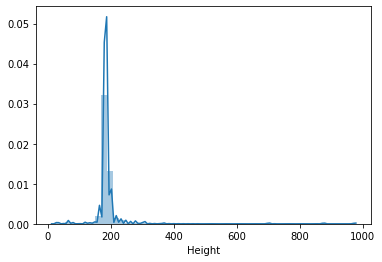

In [47]:
# Male Height
show_distplot(male_heroes_df, 'Male', 'Height')

In [48]:
male_heroes_df['Height'].describe()

count    504.000000
mean     189.375000
std       58.127058
min       15.200000
25%      183.000000
50%      183.000000
75%      188.000000
max      975.000000
Name: Height, dtype: float64

In [49]:
# get rid of the Nan value in weight
male_heroes_df = male_heroes_df.dropna()

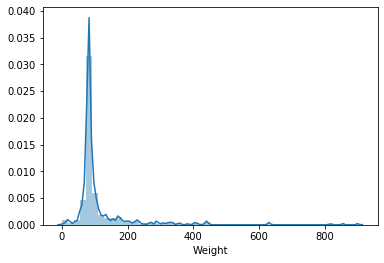

In [50]:
# Male Weight
show_distplot(male_heroes_df, 'Male', 'Weight')

In [51]:
male_heroes_df['Weight'].describe()

count    463.000000
mean     112.939525
std       96.656019
min        2.000000
25%       81.000000
50%       81.000000
75%      101.000000
max      900.000000
Name: Weight, dtype: float64

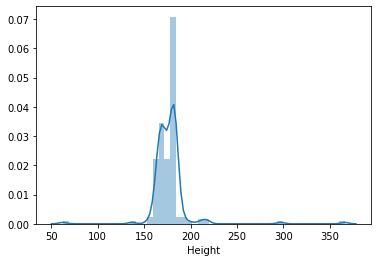

In [52]:
# Female Heighta
show_distplot(female_heroes_df, 'Female', 'Height')

In [53]:
female_heroes_df['Height'].describe()

count    200.000000
mean     177.012500
std       20.434381
min       62.500000
25%      168.000000
50%      175.000000
75%      183.000000
max      366.000000
Name: Height, dtype: float64

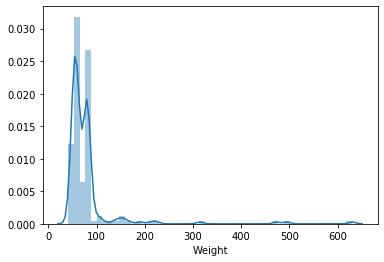

In [54]:
# Female Weight
show_distplot(female_heroes_df, 'Female', 'Weight')

In [55]:
female_heroes_df['Weight'].describe()

count    200.000000
mean      79.465000
std       64.801892
min       41.000000
25%       55.000000
50%       63.000000
75%       81.000000
max      630.000000
Name: Weight, dtype: float64

Discuss your findings from the plots above, with respect to the distribution of height and weight by gender.  Your explanation should include a discussion of any relevant summary statistics, including mean, median, mode, and the overall shape of each distribution.  

Write your answer below this line:
____________________________________________________________________________________________________________________________



The male hero height is heavily skewed to the right with a few very tall outliers.
The female here height is pretty normal with a slight skew to the right.
If the male outliers are discounted the shapes of the two distributions would be similar and close to over lapping.  The male mean is 190 vs 177 for female and the have std'd of 59 and 20 respectively.  The core of the male distribution is spread out more then the female.

The male and female hero weights are both heavily skewed to the right.  The male mean and median are higher than the female mean and median.  The male weight has one main peak in the distribution, while the female has two peaks in the main part of the distribution.  Like the Heights, the std of the male is larger then the female, giving the core of the male distribution more spread than the female.

### Sample Question: Most Common Powers

The rest of this notebook will be left to you to investigate the dataset by formulating your own questions, and then seeking answers using pandas and numpy.  Every answer should include some sort of visualization, when appropriate. Before moving on to formulating your own questions, use the dataset to answer the following questions about superhero powers:

* What are the 5 most common powers overall?
* What are the 5 most common powers in the Marvel Universe?
* What are the 5 most common powers in the DC Universe?

In [56]:
powers_df.sum().sort_values(ascending=False).head()

Super Strength    360
Stamina           289
Durability        257
Super Speed       249
Agility           242
dtype: int64

In [57]:
marvel_df = joined_df[joined_df['Publisher'] == 'Marvel Comics']
marvel_df = marvel_df.dropna()
marvel_df

,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight,Agility,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
name,,,,,,,,,,,,,,,,,,,,,
A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0,False,...,False,False,False,False,False,False,False,False,False,False
Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0,False,...,False,False,False,False,False,False,False,False,False,False
Abraxas,Male,blue,Cosmic Entity,Black,183.0,Marvel Comics,-,bad,81.0,False,...,False,False,False,False,False,False,False,False,False,False
Absorbing Man,Male,blue,Human,No Hair,193.0,Marvel Comics,-,bad,122.0,False,...,False,False,False,False,False,False,False,False,False,False
Agent Bob,Male,brown,Human,Brown,178.0,Marvel Comics,-,good,81.0,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
X-23,Female,green,Mutant / Clone,Black,155.0,Marvel Comics,-,good,50.0,True,...,False,False,False,False,False,False,False,False,False,False
X-Man,Male,blue,-,Brown,175.0,Marvel Comics,-,good,61.0,False,...,False,False,False,False,False,False,False,False,False,False
Yellowjacket,Male,blue,Human,Blond,183.0,Marvel Comics,-,good,83.0,False,...,False,False,False,False,False,False,False,False,False,False


In [58]:
joined_df_v2 = heroes_df.join(powers_df, on='name', how='inner')
joined_df_v2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 660 entries, A-Bomb to Zoom
Columns: 176 entries, Gender to Omniscient
dtypes: bool(167), float64(2), object(7)
memory usage: 159.2+ KB


In [59]:
joined_df_v2 = joined_df_v2.drop(['Gender', 'Eye color', 'Race', 'Hair color', 'Skin color',
                                  'Alignment'], axis=1)

In [60]:
joined_df_v2 = joined_df_v2.drop(['Height', 'Weight'], axis=1)
joined_df_v2

,Publisher,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
name,,,,,,,,,,,,,,,,,,,,,
A-Bomb,Marvel Comics,False,True,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Abe Sapien,Dark Horse Comics,True,True,False,False,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Abin Sur,DC Comics,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Abomination,Marvel Comics,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Abraxas,Marvel Comics,False,False,False,True,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Yellowjacket II,Marvel Comics,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
Ymir,Marvel Comics,False,False,False,False,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Yoda,George Lucas,True,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False


In [61]:
marvel_df_v2 = joined_df_v2[joined_df_v2['Publisher'] == 'Marvel Comics']

In [62]:
marvel_df_v2 = marvel_df_v2.dropna()
marvel_df_v2

,Publisher,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
name,,,,,,,,,,,,,,,,,,,,,
A-Bomb,Marvel Comics,False,True,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Abomination,Marvel Comics,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Abraxas,Marvel Comics,False,False,False,True,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
Absorbing Man,Marvel Comics,False,False,False,False,True,True,False,True,False,...,False,False,False,False,False,False,False,False,False,False
Agent Bob,Marvel Comics,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
X-23,Marvel Comics,True,True,False,False,False,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False
X-Man,Marvel Comics,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
Yellowjacket,Marvel Comics,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [63]:
marvel_df_v2 = marvel_df_v2.drop('Publisher', axis=1)
marvel_df_v2

,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,Danger Sense,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
name,,,,,,,,,,,,,,,,,,,,,
A-Bomb,False,True,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Abomination,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Abraxas,False,False,False,True,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
Absorbing Man,False,False,False,False,True,True,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
Agent Bob,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
X-23,True,True,False,False,False,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
X-Man,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
Yellowjacket,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [64]:
marvel_df_v2.sum().sort_values(ascending=False).head()

Super Strength    204
Durability        154
Stamina           150
Super Speed       137
Agility           126
dtype: int64

In [65]:
dc_df = joined_df_v2[joined_df_v2['Publisher'] == 'DC Comics']
dc_df = dc_df.dropna()
dc_df = dc_df.drop('Publisher', axis=1)
dc_df.sum().sort_values(ascending=False).head()

Super Strength    109
Stamina            90
Flight             86
Super Speed        79
Agility            71
dtype: int64

In [66]:
powers_df.sum().sort_values(ascending=False).head()

Super Strength    360
Stamina           289
Durability        257
Super Speed       249
Agility           242
dtype: int64

Analyze the results you found above to answer the following question:

How do the top 5 powers in the Marvel and DC universes compare?  Are they similar, or are there significant differences? How do they compare to the overall trends in the entire Superheroes dataset?

Write your answer below this line:
____________________________________________________________________________________________________________________________

Overall and both subsets are very similar and share 4 out of 5 powers, but DC has Flight, which doesn't show up in the overall top 5 powers or in Marvel.  There are also more heroes in Marvel vs DC.

### Your Own Investigation

For the remainder of this lab, you'll be focusing on coming up with and answering your own question, just like we did above.  Your question should not be overly simple, and should require both descriptive statistics and data visualization to answer.  In case you're unsure of what questions to ask, some sample questions have been provided below.

Pick one of the following questions to investigate and answer, or come up with one of your own!

* Which powers have the highest chance of co-occurring in a hero (e.g. super strength and flight), and does this differ by gender?
* Is there a relationship between a hero's height and weight and their powerset?
* What is the distribution of skin colors amongst alien heroes?

Explain your question below this line:
____________________________________________________________________________________________________________________________



Some sample cells have been provided to give you room to work. If you need to create more cells, you can do this easily by:

1. Highlighting a cell and then pressing `esc` to enter command mode.
1. Pressing `b` to add a cell below the currently highlighted cell, or `a` to add one above it.  

Be sure to include thoughtful, well-labeled visualizations to back up your analysis!

In [67]:
heroes_df[heroes_df['Race'] == 'Alien']

,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
name,,,,,,,,,
Ardina,Female,white,Alien,Orange,193.0,Marvel Comics,gold,good,98.0
Blackwulf,Male,red,Alien,White,188.0,Marvel Comics,-,-,88.0
Century,Male,white,Alien,White,201.0,Marvel Comics,grey,good,97.0
Doomsday,Male,red,Alien,White,244.0,DC Comics,-,bad,412.0
Evilhawk,Male,red,Alien,Black,191.0,Marvel Comics,green,bad,106.0
Indigo,Female,-,Alien,Purple,183.0,DC Comics,-,neutral,81.0
Silver Surfer,Male,white,Alien,No Hair,193.0,Marvel Comics,silver,good,101.0


Text(0.5, 1.0, 'Distribution of Skin Colors of Alien Heroes')

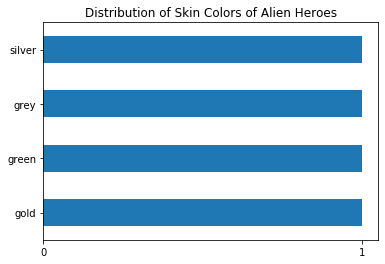

In [100]:
heroes_df['Skin color'][(heroes_df['Race'] == 'Alien') & (heroes_df['Skin color'] != '-')].value_counts().plot(kind='barh', xticks=[0, 1])
plt.title('Distribution of Skin Colors of Alien Heroes')

Text(0.5, 1.0, 'Distribution of Skin Colors of ALL Heroes')

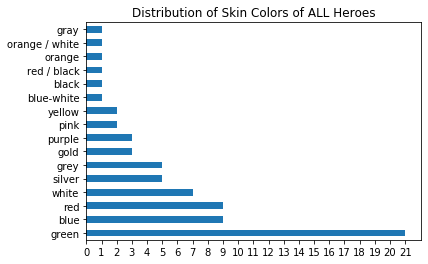

In [97]:
heroes_df_subset = heroes_df['Skin color'][heroes_df['Skin color'] != '-']
heroes_df_subset.value_counts().plot(kind='barh', xticks=range(0, heroes_df_subset.value_counts().max()+1))
plt.title('Distribution of Skin Colors of ALL Heroes')

In [95]:
heroes_df_subset.value_counts().max()

21

The distributin of skin colors of the Alien Heroes is even at 1 each of 4 different colors.  The skin colors across the population is highly skewed to green, which isn't represented in the Alien hero sample.

## Summary

In this lab, we demonstrated our mastery of:
* Using all of our Pandas knowledge to date to clean the dataset and deal with null values
* Using Queries and aggregations to group the data into interesting subsets as needed
* Using descriptive statistics and data visualization to find answers to questions we may have about the data